In [13]:
%matplotlib inline
# Dependencies and Setup
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [14]:
nba_data = '../Potential Data Sets/NBA Free Throw Data.csv'
nba_data_df = pd.read_csv(nba_data)

In [23]:
# Clean-up team names to current name to combine accurately 
nba_data_df['Team'].replace({'Charlotte Bobcats':'Charlotte Hornets', 'New Orleans Hornets': 'New Orleans Pelicans', 'Los Angeles Clippers': 'LA Clippers'},inplace=True)
nba_data_df.head()

,Team,Season,Venue,Wins,Loss,Win%,FT Made,FT Att,FT%,Win Rnk,Loss Rnk,Win% Rnk,FT Made Rnk,FT ATT Rnk,FT% Rnk,Total Points
0,Atlanta Hawks,2012-13,Home,25,16,0.610,595,856,0.695,15,15,15,27,24,28,4075
1,Boston Celtics,2012-13,Home,27,13,0.675,675,889,0.759,13,12,13,20,21,15,3940
2,Brooklyn Nets,2012-13,Home,26,15,0.634,724,1003,0.722,14,14,14,11,10,25,4001
3,Charlotte Hornets,2012-13,Home,15,26,0.366,823,1076,0.765,28,28,28,3,6,11,3955
4,Chicago Bulls,2012-13,Home,24,17,0.585,685,892,0.768,16,16,16,17,20,10,3809


In [18]:
teams_data = nba_data_df.groupby('Team')

In [56]:
teams_data_df = pd.DataFrame({'FT Successful': teams_data['FT Made'].sum(), 'FT Attempted': teams_data['FT Att'].sum(),\
                              'Successful FT %': round(teams_data['FT Made'].sum()/teams_data['FT Att'].sum()*100,2),\
                             'Win Rank': round(teams_data['Win Rnk'].mean(),0), 'FT Successful Rank':\
                             round(teams_data['FT Made Rnk'].mean(),0), 'FT Attempted Rank': round(teams_data['FT ATT Rnk'].mean(),0),\
                             'Total Points': teams_data['Total Points'].sum()})
teams_data_df

,FT Successful,FT Attempted,Successful FT %,Win Rank,FT Successful Rank,FT Attempted Rank,Total Points
Team,,,,,,,
Atlanta Hawks,18730,24656,75.97,15.0,20.0,19.0,118286
Boston Celtics,19064,24344,78.31,12.0,20.0,21.0,118138
Brooklyn Nets,20238,26764,75.62,19.0,12.0,12.0,116828
Charlotte Hornets,21308,27730,76.84,19.0,8.0,10.0,116034
Chicago Bulls,19512,24982,78.10,16.0,17.0,20.0,114220
Cleveland Cavaliers,19598,25770,76.05,14.0,17.0,16.0,118996
Dallas Mavericks,18812,24250,77.58,17.0,19.0,21.0,117818
Denver Nuggets,20484,27476,74.55,14.0,12.0,11.0,121758
Detroit Pistons,18246,25902,70.44,19.0,23.0,16.0,115584


In [45]:
#Verify total team number correct 
print(len(teams_data_df))

30


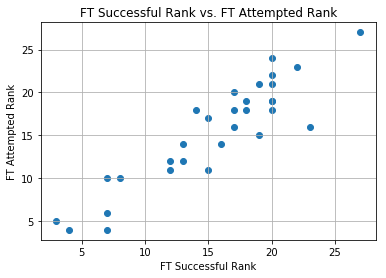

In [48]:
#supporting evidence

plt.scatter(teams_data_df['FT Successful Rank'], teams_data_df['FT Attempted Rank'],marker ="o")
plt.title('FT Successful Rank vs. FT Attempted Rank')
plt.xlabel('FT Successful Rank')
plt.ylabel('FT Attempted Rank')
plt.grid()
plt.savefig('Successful vs. Attempted.png')
plt.show()

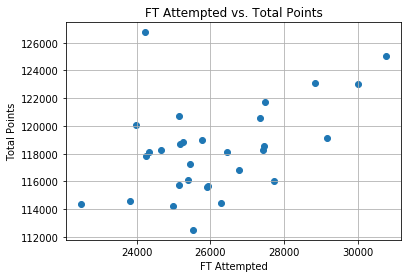

In [49]:
#supporting evidence

plt.scatter(teams_data_df['FT Attempted'], teams_data_df['Total Points'],marker ="o")
plt.title('FT Attempted vs. Total Points')
plt.xlabel('FT Attempted')
plt.ylabel('Total Points')
plt.grid()
plt.savefig('Attempts vs. Total Points.png')
plt.show()

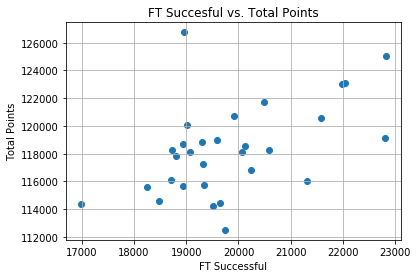

In [50]:
#supporting evidence

plt.scatter(teams_data_df['FT Successful'], teams_data_df['Total Points'],marker ="o")
plt.title('FT Succesful vs. Total Points')
plt.xlabel('FT Successful')
plt.ylabel('Total Points')
plt.grid()
plt.savefig('Successful FTs vs. Total Points.png')
plt.show()

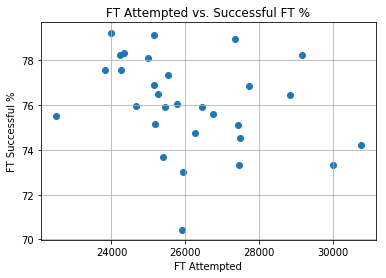

In [52]:
# not supporting evidence

plt.scatter(teams_data_df['FT Attempted'], teams_data_df['Successful FT %'],marker ="o")
plt.title('FT Attempted vs. Successful FT %')
plt.xlabel('FT Attempted')
plt.ylabel('FT Successful %')
plt.grid()
plt.savefig('FT Attempted vs. FT Successful %.png')
plt.show()

In [58]:
teams_data_df.sort_values(by='Successful FT %', ascending=False)

,FT Successful,FT Attempted,Successful FT %,Win Rank,FT Successful Rank,FT Attempted Rank,Total Points
Team,,,,,,,
San Antonio Spurs,19008,23988,79.24,5.0,20.0,24.0,120076
Portland Trail Blazers,19906,25160,79.12,10.0,14.0,18.0,120716
Toronto Raptors,21576,27334,78.93,8.0,7.0,10.0,120580
Boston Celtics,19064,24344,78.31,12.0,20.0,21.0,118138
Minnesota Timberwolves,22810,29156,78.23,21.0,3.0,5.0,119144
Golden State Warriors,18954,24228,78.23,4.0,20.0,22.0,126758
Chicago Bulls,19512,24982,78.10,16.0,17.0,20.0,114220
Dallas Mavericks,18812,24250,77.58,17.0,19.0,21.0,117818
New York Knicks,18478,23828,77.55,22.0,22.0,23.0,114558


In [ ]:
player_data = 